<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Covid_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is COVID-19?
---
*Source- World Health Organisation (https://www.who.int/health-topics/coronavirus#tab=tab_1)
---
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.4 (estimated by Imperial College, London). See https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7751056/ for more information. R0 helps the governments across the world to estimate the future caseloads, to come up with interventions to avoid any unfavorable condition. An R0 above 1 means that the number of cases can have exponential growth rate around the world. Flattening the Curve typically implies even if the number of confirmed cases are increasing but the distribution of those cases will be over longer time giving health care bodies around the world time to act to save lives.

Like all living things, viruses mutate as well but are faster at mutating giving us all new challenges to deal with. Currently, the world is dealing with many variants of the Covid-19 virus but the spread is dominated by Omicron variant which is faster at the rate of infection (R0) than the other variants.
https://www.nature.com/articles/d41586-020-02544-6

#Objective of this notebook
---
* to study COVID-19 outbreak with the help of basic visualizations techniques.
* particularly look at the current (March 2022) UK data on confirmed cases, hospitalisation and UK vaccination datas.
* understand the world-wide vaccination strategy using analyses and visualisations.

#Data and sources
---
####**Daily confirmed cases as of 22 March 2022 in the UK**
The current daily updates on number of confirmed cases, new deaths etc are published by the official UK government website for data and insights on coronavirus (COVID-19) and can be found at https://coronavirus.data.gov.uk/

The number of confirmed cases by date reported in the UK can be found at 
https://coronavirus.data.gov.uk/details/cases?areaType=overview&areaName=United%20Kingdom

Data can be directly downloaded from:
https://api.coronavirus.data.gov.uk/v1/data
or
I have uploaded the csv data to my dataset folder at
https://github.com/JaySanthanam/Programming-for-data/blob/main/Datasets/UK_covid_data_2022-Mar-22.csv

####**Hospitalisation Data in the UK**
The number of confirmed cases by date reported in the UK can be found at 
https://coronavirus.data.gov.uk/details/healthcare
I have uploaded the csv data to my dataset folder at
https://github.com/JaySanthanam/Programming-for-data/blob/main/Datasets/data_2022-Mar-22_hospital.csv

####**UK Vaccine data**
UK vaccine data:
The country-wide vaccine data for the UK can be found at github (thanks to Lucas Rodés-Guirao) at 
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv

####**World-wide vaccine data**
World-wide vaccination data can be found on github (thanks to Lucas Rodés-Guirao) at 
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv

We will be using data from these sources to do our analyses and visualisations. The first data is in json format (from API) while the next two are csv files and the last one is in Excel format. This data was published in 2021 - so may need updating.

# UK's current daily update
---

Let's study the current update on daily cases in the UK until today (23/03/2022). To do this we have to first upload the json data into pandas. So, let's import the necessary libraries (json, requests and pandas).

##Retrieve Data 

In [ ]:
import json
import requests
import pandas as pd
import numpy as np

Now let's read the json data and convert it to a dataframe to be used in pandas.

In [ ]:

url = "https://api.coronavirus.data.gov.uk/v1/data"
response_API = requests.get(url)
data = response_API.text
parse_json = json.loads(data)
#parse_json
daily_UK_df = pd.json_normalize(parse_json['data'])

##Inspect data

We now have a pandas data frame. So let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [ ]:
daily_UK_df.head()

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
0,2022-03-23,United Kingdom,K02000001,30583.8,102483,20515998,194.0,164123.0,244.7
1,2022-03-22,United Kingdom,K02000001,30431.4,94524,20413731,250.0,163929.0,244.4
2,2022-03-21,United Kingdom,K02000001,30290.8,226524,20319434,169.0,163679.0,244.0
3,2022-03-20,United Kingdom,K02000001,29954.4,0,20093762,0.0,163511.0,243.8
4,2022-03-19,United Kingdom,K02000001,29954.4,0,20093762,0.0,163511.0,243.8


In [ ]:
daily_UK_df.tail()

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
778,2020-02-04,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
779,2020-02-03,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
780,2020-02-02,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
781,2020-02-01,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
782,2020-01-31,United Kingdom,K02000001,NaN,2,2,NaN,NaN,NaN


So we have data from 21/01/2020 to 22//03/2022 on number of confirmed cases daily (confirmedRate) and cummulative confirmed cases of covid-19 and number of new deaths and death rate.

In [ ]:
daily_UK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           783 non-null    object 
 1   areaName       783 non-null    object 
 2   areaCode       783 non-null    object 
 3   confirmedRate  753 non-null    float64
 4   latestBy       783 non-null    int64  
 5   confirmed      783 non-null    int64  
 6   deathNew       748 non-null    float64
 7   death          748 non-null    float64
 8   deathRate      739 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 55.2+ KB


That was our technical summary on data types. Let's get some stats now.

In [ ]:
daily_UK_df.describe()

,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
count,753.000000,783.000000,7.830000e+02,748.000000,748.000000,739.000000
mean,7605.878619,25278.948914,4.906634e+06,217.862299,95096.025401,143.489851
std,8036.643596,33686.767310,5.376723e+06,299.785699,49997.834704,73.313957
min,0.100000,0.000000,2.000000e+00,0.000000,1.000000,0.100000
25%,513.100000,2442.000000,3.156470e+05,27.000000,41592.000000,62.100000
50%,6333.000000,13013.000000,4.154562e+06,111.500000,125548.000000,187.900000
75%,10940.500000,37256.000000,7.113332e+06,259.750000,135024.000000,201.600000
max,30583.800000,226524.000000,2.051600e+07,1820.000000,164123.000000,244.700000


This tells us that so far there has been an average of 25180 confirmed Covid-19 cases per day in the UK since 31/01/2020 with a maximum of 226524 confirmed cases reported on a single day. 

###When was the maximum number of confirmed cases per day reported?

In [ ]:
daily_UK_df[daily_UK_df['latestBy']==daily_UK_df['latestBy'].max()]

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
2,2022-03-21,United Kingdom,K02000001,30290.8,226524,20319434,169.0,163679.0,244.0


###When was the maximum number of covid-related deaths per day reported?

In [ ]:
daily_UK_df[daily_UK_df['deathNew']==daily_UK_df['deathNew'].max()]

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
427,2021-01-20,United Kingdom,K02000001,5226.1,38905,3505754,1820.0,93290.0,139.1


##Clean and sort data

Let's drop the column 'areacode' and 'areaName'. We know that this is UK data. There is no point in keeping those two columns.

In [ ]:
#Dropping columns
daily_UK_df.drop(["areaCode"],1,inplace=True)
daily_UK_df.drop(["areaName"],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Did this work?

In [ ]:
daily_UK_df.head()

,date,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
0,2022-03-23,30583.8,102483,20515998,194.0,164123.0,244.7
1,2022-03-22,30431.4,94524,20413731,250.0,163929.0,244.4
2,2022-03-21,30290.8,226524,20319434,169.0,163679.0,244.0
3,2022-03-20,29954.4,0,20093762,0.0,163511.0,243.8
4,2022-03-19,29954.4,0,20093762,0.0,163511.0,243.8


##Explore the data
---
Now, let's use the data to gain an understanding of what is happening with the Covid-19 cases in the UK.

Before proceeding, the assumptions for the column headings and their meaning are as follows:

1. latestBy is the new Covid-19 cases reported for that date
2. confirmed is the cumulative number of confirmed cases till that date
3. deathNew is the new Covid-related death reported on that day
4. death is the cumulative death until that date.

My conclusions from here on will be based on these.

###Daily confirmed covid cases using a line plot.

Let's visualise the number of cases recorded each day in the UK since 31/01/2020.

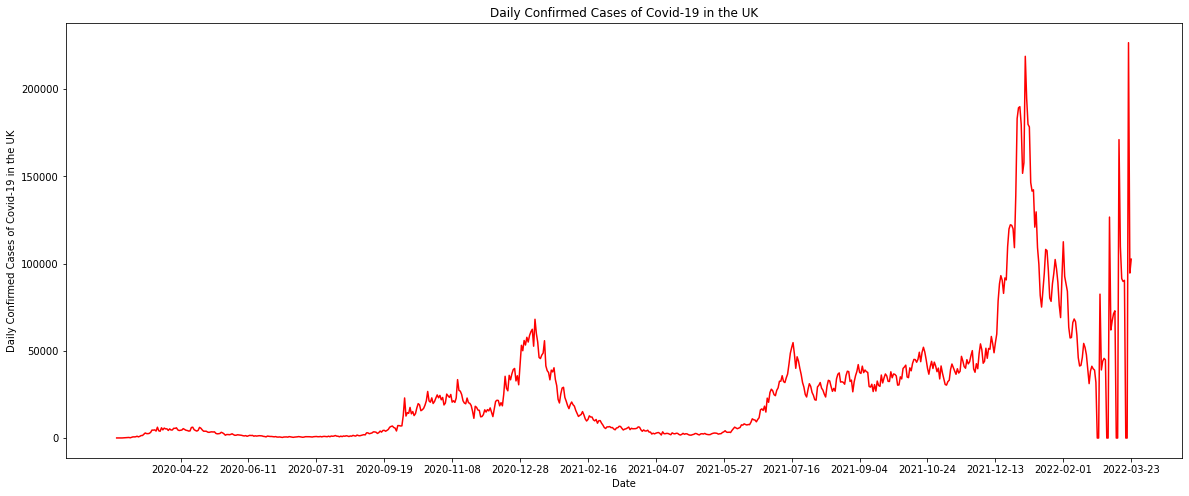

In [ ]:
import matplotlib  
import matplotlib.pyplot as plt
import numpy as np
def do_line_plot(x,y,x_label,y_label,title):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x, y, color='r')
  ax.invert_xaxis()
  ax.set_xticks(ax.get_xticks()[::50])
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()
  return

data = daily_UK_df.dropna(subset = ['date','latestBy','confirmed','deathNew','death'])
date = np.array(data['date'])
daily_cases = np.array(data['latestBy'])

do_line_plot(date,daily_cases,"Date","Daily Confirmed Cases of Covid-19 in the UK", "Daily Confirmed Cases of Covid-19 in the UK")


###Cumulative number of confirmed cases of Covid-19 in the UK

Often, it helps to know the total number of cases to date to get an overall picture. So let's look at the cummulative number of case - this is given in the column 'confirmedRate' of the dataframe.

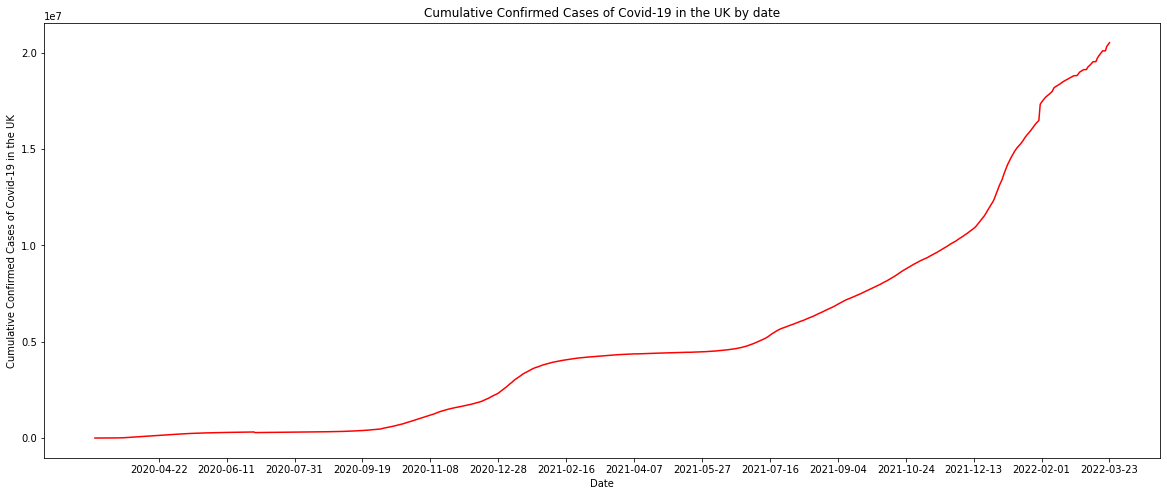

In [ ]:
cumm_cases = np.array(data['confirmed'])
do_line_plot(date,cumm_cases,"Date","Cumulative Confirmed Cases of Covid-19 in the UK","Cumulative Confirmed Cases of Covid-19 in the UK by date")

Epidemiologists use lograthmic scale for cumulative cases to estimate R0 (which helps us get an idea of how many more cases to expect). So let's plot our data in lograthmic scale for the y-axis (the cummulative cases).

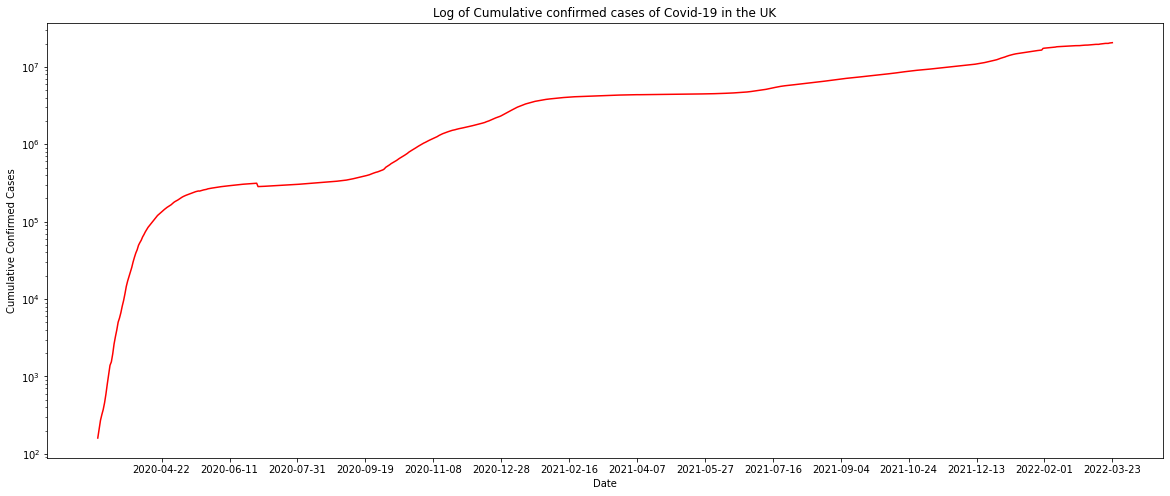

In [ ]:
def do_log_lineplot(x,y,x_label,y_label,title):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(date,cumm_cases, color='r')
  ax.invert_xaxis()
  ax.set_yscale('log')
  ax.set_xticks(ax.get_xticks()[::50])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()
  return

do_log_lineplot(date,cumm_cases,"Date","Cumulative Confirmed Cases","Log of Cumulative confirmed cases of Covid-19 in the UK")

**The slope of this graph is usually used to estimate the R0.**

###Daily reported Covid-related deaths

Currently, the number of cases are clearly increasing. But, the main concern for the government all over the world is to keep the number of covid related deaths to a minimum. Let's take a look at the number of daily reported covid-related deaths from the data.

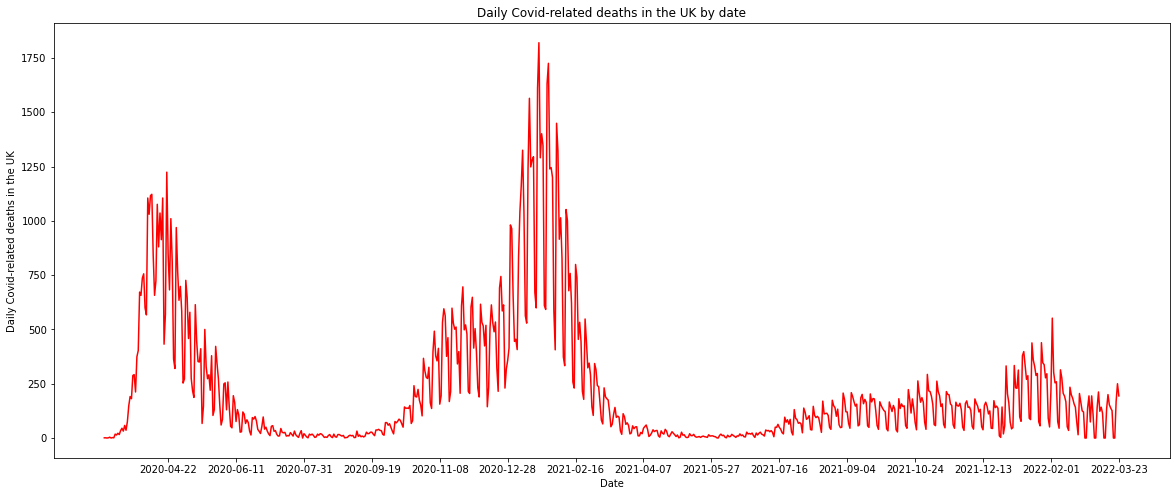

In [ ]:
daily_deaths = np.array(data['deathNew'])

do_line_plot(date,daily_deaths,"Date","Daily Covid-related deaths in the UK","Daily Covid-related deaths in the UK by date")


So, from the above graph we can see that although the confirmed Covid-cases are raising, the number of covid-related deaths are being kept as low as possible, given the circumstances. 

It will be useful to see both the number of cases and the number of deaths together in one graph, so let's take a look.

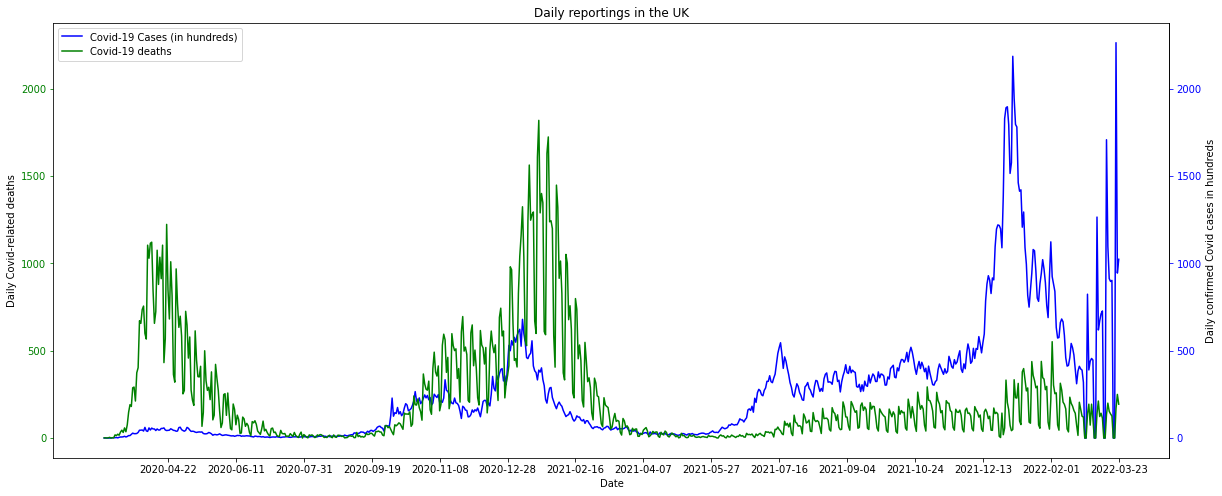

In [ ]:
def visualise_multiaxes_plots(x_array1,y_array1,y_array2,x_label,y_label,y_label2,plot_title,label1,label2):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x_array1, y_array1, 'b', label=label1)
  ax.plot(x_array1, y_array2, 'g', label=label2)
  ax.invert_xaxis()
  ax.tick_params(axis='y', colors='g')
  ax.set_xticks(ax.get_xticks()[::50])
  secax = ax.secondary_yaxis('right', functions=None)
  secax.set_ylabel(y_label2)
  secax.tick_params(axis='y', colors='b')
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

cases_hundreds = daily_cases//100
visualise_multiaxes_plots(date,cases_hundreds,daily_deaths,"Date","Daily Covid-related deaths","Daily confirmed Covid cases in hundreds","Daily reportings in the UK","Covid-19 Cases (in hundreds)","Covid-19 deaths")

We can clearly see that despite the large increase in number of cases, the number of deaths are lower than before.

###Cumulative reported Covid-related deaths

Again, to get an overall picture of number of Covid-related deaths since the 31/01/2020, let's look at the cumulative number of Covid-related deaths - given in the column, 'death'

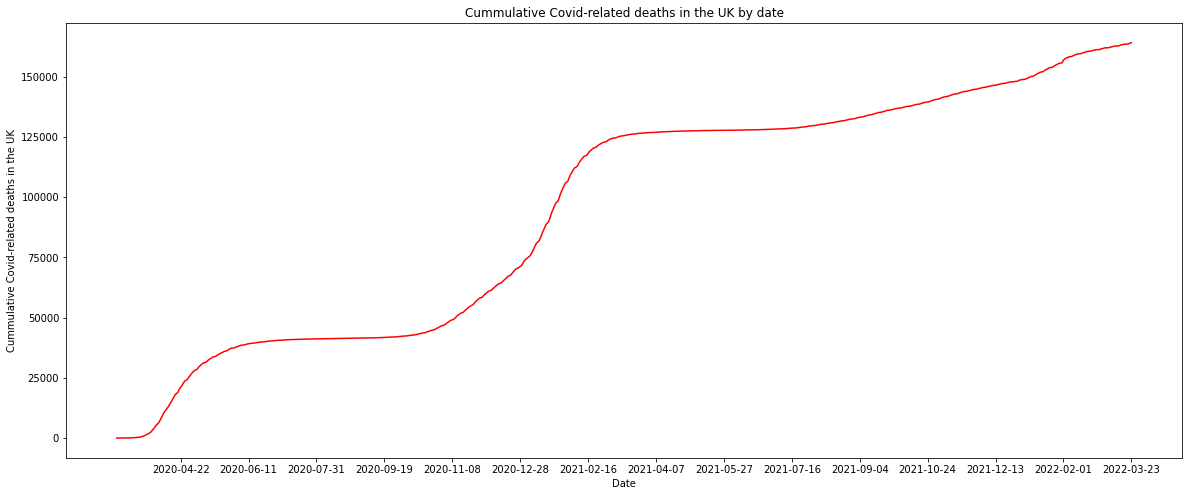

In [ ]:
cumm_death = np.array(data['death'])
do_line_plot(date,cumm_death,"Date","Cummulative Covid-related deaths in the UK", "Cummulative Covid-related deaths in the UK by date")

Unfortunatley, we have lost more than 150,000 people in the Uk due to Covid-19 since 31/01/2020.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


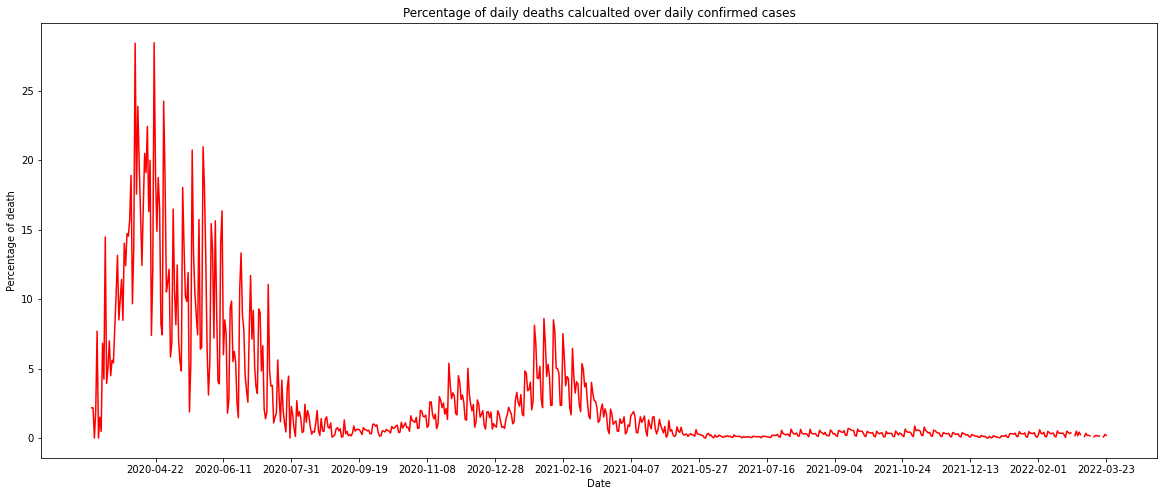

In [ ]:
percentage_death = (daily_deaths/daily_cases)*100
do_line_plot(date,percentage_death,"Date","Percentage of death", "Percentage of daily deaths calcualted over daily confirmed cases")

**I'm aware of the warning "invalid value encountered in true_divide" is due to 0 cases recorded in some days.**

The above the graph shows that the percentage of people tested positive who die of Covid-19 infection (confirmed cases) has been going down and it is quite smaller now compared to the beginning of the pandemic.

###Note: 
The confirmed cases may be under reported during the early stages of infections since the testing wasn't as prevalant in the initail stages of Covid infections. This very likely has lead to skewed higher percentage of deaths seen in the above figure. The actual percentage is probably less than being seen here.

#Conclusion on Daily Covid-cases in the UK
---

We have used pandas to read json data, clean and sort the data, analyse and visualise the daily covid-cases and related deaths to get an understanding of the situation we are facing.

Clearly, although the number of cases are raising in the UK, the covid-related deaths seems to low. 

#Hospitalisation Data in the UK
---
One of the things many of us are worried about next to keeping the Covid-related deaths to a minimum is to keep the Covid-related hospitalisation down. Next, let's look at the Hospitalisation data in the UK. This data has been uploaded to my datasets folder as a csv file which can be found at https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/data_2022-Mar-22_hospital.csv

## Retreive Data

In [ ]:
def get_csv_data(url):
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/data_2022-Mar-22_hospital.csv"
hosp_df = get_csv_data(url)

##Inspect data
---
Let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [ ]:
hosp_df.head()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,18/03/2022,1879,768272
1,overview,United Kingdom,K02000001,17/03/2022,2004,766393
2,overview,United Kingdom,K02000001,16/03/2022,2067,764389
3,overview,United Kingdom,K02000001,15/03/2022,2077,762322
4,overview,United Kingdom,K02000001,14/03/2022,1946,760245


In [ ]:
hosp_df.tail()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
721,overview,United Kingdom,K02000001,27/03/2020,2229,12839
722,overview,United Kingdom,K02000001,26/03/2020,1931,10610
723,overview,United Kingdom,K02000001,25/03/2020,2087,8679
724,overview,United Kingdom,K02000001,24/03/2020,1718,6592
725,overview,United Kingdom,K02000001,23/03/2020,1273,4874


This means we have hospitalisation data from 23/03/2020 to 18/03/2022

In [ ]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaType       726 non-null    object
 1   areaName       726 non-null    object
 2   areaCode       726 non-null    object
 3   date           726 non-null    object
 4   newAdmissions  726 non-null    int64 
 5   cumAdmissions  726 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 34.2+ KB


There are no null values.

In [ ]:
hosp_df.describe()

,newAdmissions,cumAdmissions
count,726.000000,726.000000
mean,1053.265840,379168.404959
std,893.021901,211499.910103
min,73.000000,4874.000000
25%,301.000000,139857.750000
50%,864.000000,455455.000000
75%,1490.250000,540074.250000
max,4580.000000,768272.000000


Average daily Covid-related hospital admissions is 1053 with a maximum of 4580 in one day. From 23/03/2020 to 18/03/2022 (nearly 2 years) we have had 379,168 total Covid-related hospital admissions.

When did we have the maximum hospital admission for covid-related cases.

In [ ]:
hosp_df[hosp_df['newAdmissions']==hosp_df['newAdmissions'].max()]

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
430,overview,United Kingdom,K02000001,12/01/2021,4580,336431


The 12/01/2021 had the highest covid-related hospital admissions of 4580 people.

##Clean and sort Data
---
Again there are som unnecessary columns: 'areaType', 'areaName', 'areaCode'. So, we can drop them for future use.

In [ ]:
hosp_df.drop(['areaType', 'areaName','areaCode' ], axis = 1)

,date,newAdmissions,cumAdmissions
0,18/03/2022,1879,768272
1,17/03/2022,2004,766393
2,16/03/2022,2067,764389
3,15/03/2022,2077,762322
4,14/03/2022,1946,760245
...,...,...,...
721,27/03/2020,2229,12839
722,26/03/2020,1931,10610
723,25/03/2020,2087,8679
724,24/03/2020,1718,6592


##Explore the data
---

The assumptions for the column headings and their meanings for this dataset are as follows:

* newAdmissions is the new Covid-19-related hospitalisations reported for that date
* cumAdmissions is the cumulative number of Covid-related hospitalisations till that date

My conclusions for this data, from here on, will be based on these.

###Daily covid-related hospitalisation using a line plot.

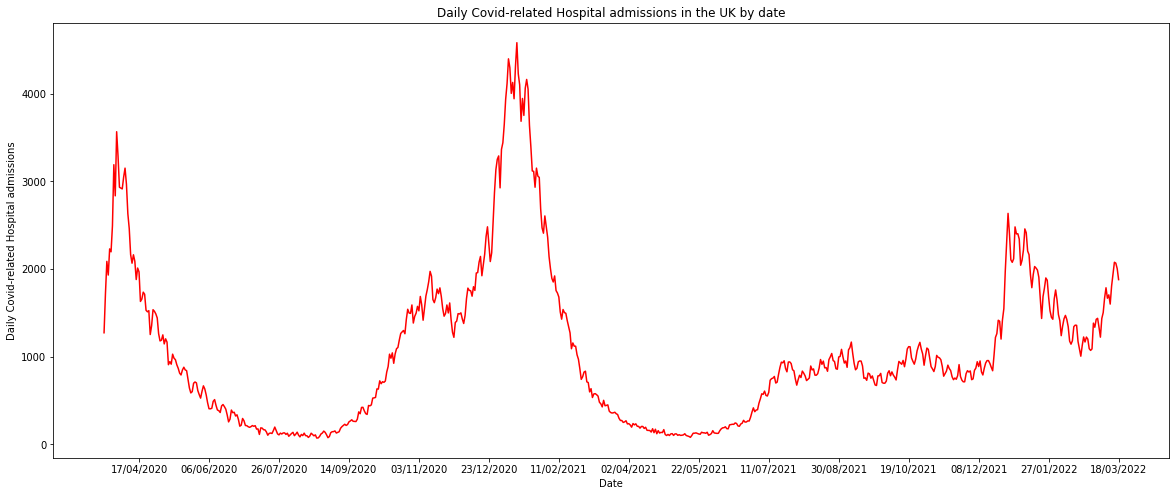

In [ ]:
hosp_date = np.array(hosp_df['date'])
hosp_daily = np.array(hosp_df['newAdmissions'])

do_line_plot(hosp_date,hosp_daily,"Date","Daily Covid-related Hospital admissions", "Daily Covid-related Hospital admissions in the UK by date")


This shows the hospitalisation trend for Covid-19 patients in the UK.

###Cumulative covid-related hospitalisation using a line plot.

This would tell us the total hospitalisation since March 2020.

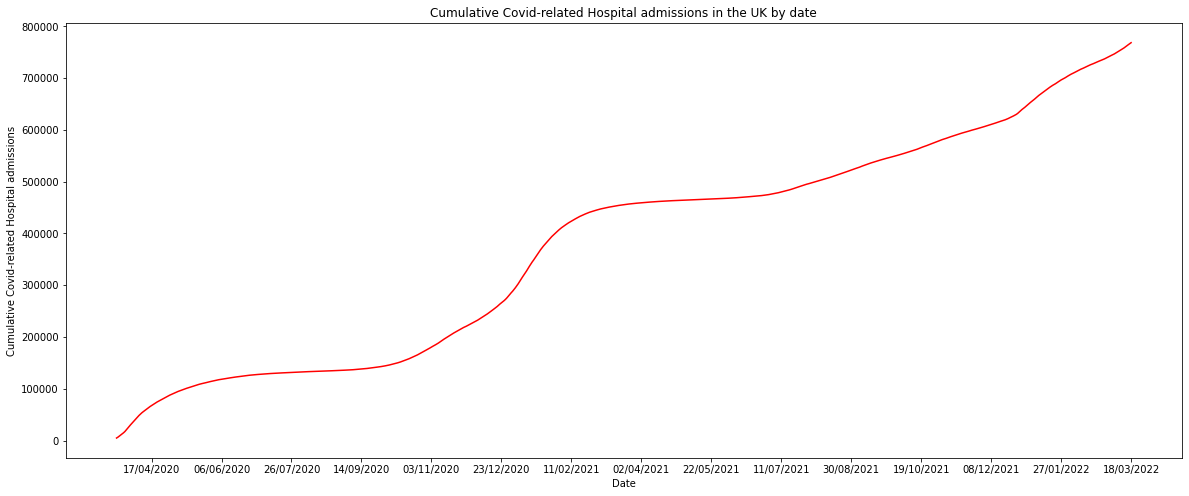

In [ ]:

hosp_cum = np.array(hosp_df['cumAdmissions'])

do_line_plot(hosp_date,hosp_cum,"Date","Cumulative Covid-related Hospital admissions","Cumulative Covid-related Hospital admissions in the UK by date")

The hospitalisation graph is still showing an increasing trend.

##Hospitilisation and death data

We do not have a single data set on both Hospitalisation numbers and Covid deaths. However, we have two separate dataframes, let's wrangle the two datas and create a new one so we can compare the two. To do that, let's make sure that the dates for two data sets match.

In [ ]:
from datetime import datetime

daily_UK_df['date'] = pd.to_datetime(daily_UK_df['date'])
#cut_date = datetime.strptime("Mar 22 2020", "%b %d %Y")
#cut_date = cut_date.date()

The Hospitalisation data starts on 23/03/2020 and finishes on 19/03/2022, while we have Covid cases and deaths collected from 31/01/2020. So let's set cut off dates for covid cases and deaths dataframe to make it easier to merge the two dataframes into a new one - without losing our original dataframe!

In [ ]:
low_date = np.array([datetime.strptime("22/03/2020", "%d/%m/%Y")]).astype('datetime64[D]')[0]
high_date = np.array([datetime.strptime("19/03/2022", "%d/%m/%Y")]).astype('datetime64[D]')[0]

In [ ]:
df1 = daily_UK_df[(daily_UK_df['date']>low_date) & (daily_UK_df['date']<high_date)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 5 to 730
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           726 non-null    datetime64[ns]
 1   confirmedRate  726 non-null    float64       
 2   latestBy       726 non-null    int64         
 3   confirmed      726 non-null    int64         
 4   deathNew       726 non-null    float64       
 5   death          726 non-null    float64       
 6   deathRate      726 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 45.4 KB


It's now time to put the two dataframes together.

In [ ]:
df_together = hosp_df.copy()
df_together['deathNew'] = df1['deathNew']
df_together.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   areaType       726 non-null    object 
 1   areaName       726 non-null    object 
 2   areaCode       726 non-null    object 
 3   date           726 non-null    object 
 4   newAdmissions  726 non-null    int64  
 5   cumAdmissions  726 non-null    int64  
 6   deathNew       721 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 39.8+ KB


In [ ]:
date1 = np.array(df_together['date'])
daily_death1 = np.array(df_together['deathNew'])
daily_hosp1 = np.array(df_together['newAdmissions'])

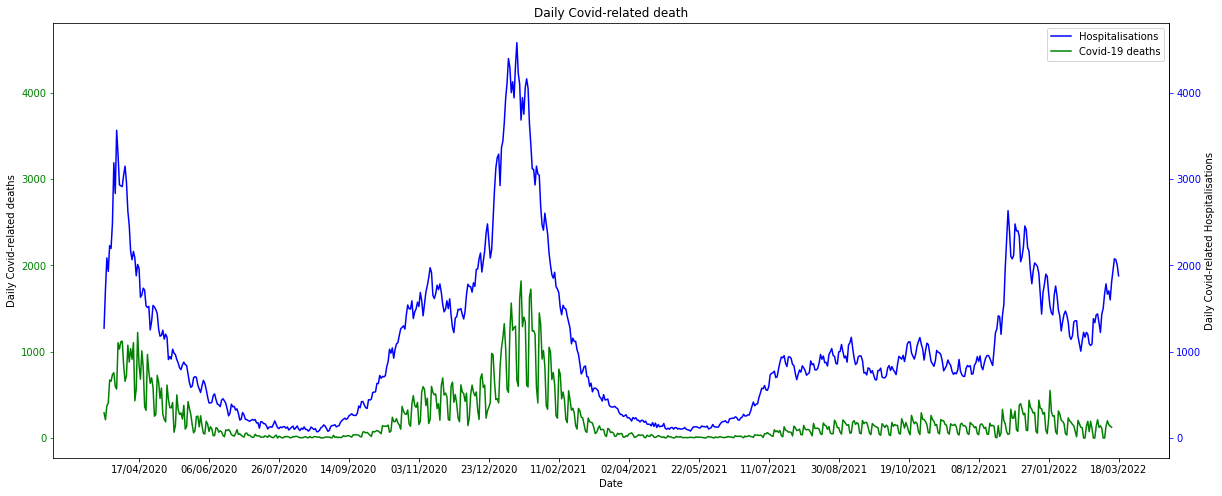

In [ ]:
visualise_multiaxes_plots(date1,daily_hosp1,daily_death1,"Date","Daily Covid-related deaths","Daily Covid-related Hospitalisations","Daily Covid-related death","Hospitalisations","Covid-19 deaths")

The above graph show that hospital care has improved in preventing covid-related deaths since April 2020.

#Conclusion on Hospitalisation Data in the UK
---
We have used pandas to read csv data from github, clean and sort the data, analyse and visualise the daily covid-related hospitalisations to get an understanding of the effect the Covid-19 has on Healthcare in the UK.

The hospitalisation for covid-related illnesses are going up again. Although it is lower than it was in Dec 2020 to Feb 2021, it is worrying. However, the death rates still remain low.

This may very likely be due to the vaccination programme. So let's look at that next!

#Vaccination Data in the UK
---

One of the intervention strategies used by many governments across the world is vaccination programmes. Let's take a look at the UK's vaccination data to get an understanding. The country-wide vaccine data for the UK can be found at github at https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv

##Retrieve Data

We already have a function to read csv data from an url. So let's use it.

In [ ]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv"
vacc_uk_df = get_csv_data(url)

##Inspect Data

Let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [ ]:
vacc_uk_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United Kingdom,2021-01-10,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,2677971,2286572,391399,NaN
1,United Kingdom,2021-01-11,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,2843815,2431648,412167,NaN
2,United Kingdom,2021-01-12,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3067541,2639309,428232,NaN
3,United Kingdom,2021-01-13,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3356229,2918252,437977,NaN
4,United Kingdom,2021-01-14,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3678180,3234946,443234,NaN


In [ ]:
vacc_uk_df.tail()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
432,United Kingdom,2022-03-18,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140631013,52730003,49284165,38616845.0
433,United Kingdom,2022-03-19,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140680847,52740240,49303269,38637338.0
434,United Kingdom,2022-03-20,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140708434,52747246,49312977,38648211.0
435,United Kingdom,2022-03-21,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140742414,52751751,49325037,38665626.0
436,United Kingdom,2022-03-22,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140776996,52756382,49336877,38683737.0


So, we have vaccination data from 10/01/2021 to 21/03/2022.


In [ ]:
vacc_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 437 non-null    object 
 1   date                     437 non-null    object 
 2   vaccine                  437 non-null    object 
 3   source_url               437 non-null    object 
 4   total_vaccinations       437 non-null    int64  
 5   people_vaccinated        437 non-null    int64  
 6   people_fully_vaccinated  437 non-null    int64  
 7   total_boosters           174 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 27.4+ KB


We have some null values in the boosters column.

In [ ]:
vacc_uk_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,4.370000e+02,4.370000e+02,4.370000e+02,1.740000e+02
mean,8.271648e+07,4.113154e+07,3.154340e+07,2.521929e+07
std,4.194851e+07,1.353916e+07,1.827334e+07,1.359183e+07
min,2.677971e+06,2.286572e+06,3.913990e+05,8.682020e+05
25%,4.875214e+07,3.421662e+07,1.453553e+07,1.229691e+07
50%,8.821139e+07,4.736942e+07,4.084197e+07,3.248183e+07
75%,1.173877e+08,5.106940e+07,4.649245e+07,3.757789e+07
max,1.407770e+08,5.275638e+07,4.933688e+07,3.868374e+07


This tells us that an average of 4.110488e+07 people have been vaccinated with  3.150259e+07 of them receiving 2 doses of vaccination and 2.514146e+07 have been given the booster.

#Explore the data
---
My assumptions for the column headings and their meanings for this dataset are as follows:

* total_vaccinations includes all the vaccinations (1st dose, 2nd dose and boosters) given to the people in the UK
*	people_vaccinated	are the number of people who have had at least 1 vaccine
* people_fully_vaccinated	are the number of people who had both vaccines
* total_boosters are the number of booster vaccines given to people.

My conclusions from here on will be based on these.

##Daily Vaccination rates (line plot)

We had written a function to do line plot but had reversed the x-axis since the data had dates in reverse order. Here we will do a line-plot function with no axis reversal.

In [ ]:
def do_lineplot_noreverse(x,y,x_label,y_label):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x, y, color='r')
  ax.set_xticks(ax.get_xticks()[::50])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()
  return

What does the trend in the number of vaccination look like?

In [ ]:
def visualise_multiple_plots(x_array1,y_array1,y_array2,x_label,y_label,plot_title,label1,label2):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x_array1, y_array1, 'b', label=label1)
  ax.plot(x_array1, y_array2, 'g', label=label2)
  ax.set_xticks(ax.get_xticks()[::50])
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

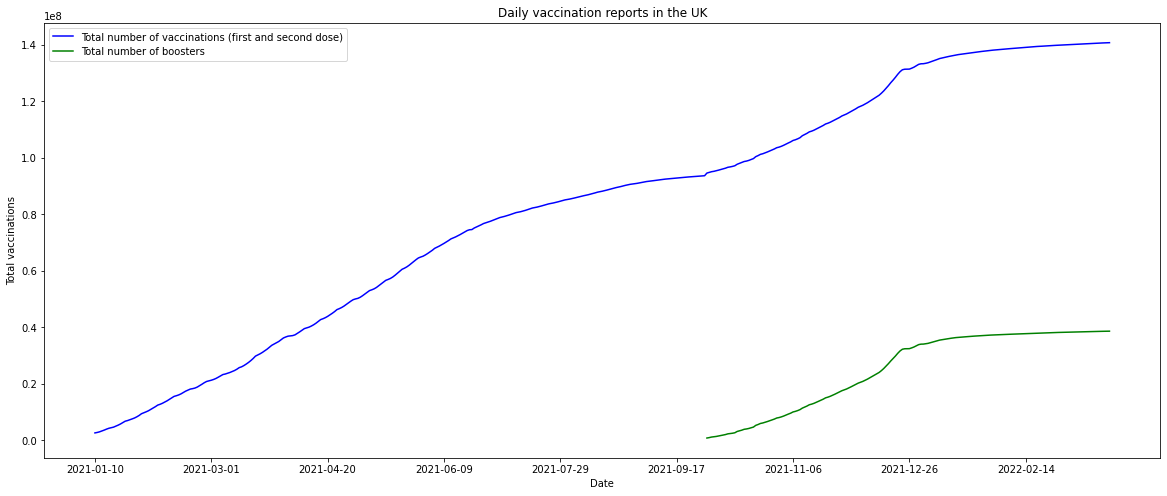

In [ ]:
vacc_date = np.array(vacc_uk_df['date'])
vacc_daily = np.array(vacc_uk_df['total_vaccinations'])
vacc_booster = np.array(vacc_uk_df['total_boosters'])

visualise_multiple_plots(vacc_date,vacc_daily,vacc_booster,"Date","Total vaccinations","Daily vaccination reports in the UK","Total number of vaccinations (first and second dose)","Total number of boosters")

The daily vaccinations have been increasing but is starting to slow down now. The booster vaccination started later in September 2021 and hasn't reached nearly the same rate as expected vaccinations before starting to slow down. 

How many are vaccinated and how many are fully vaccinated?

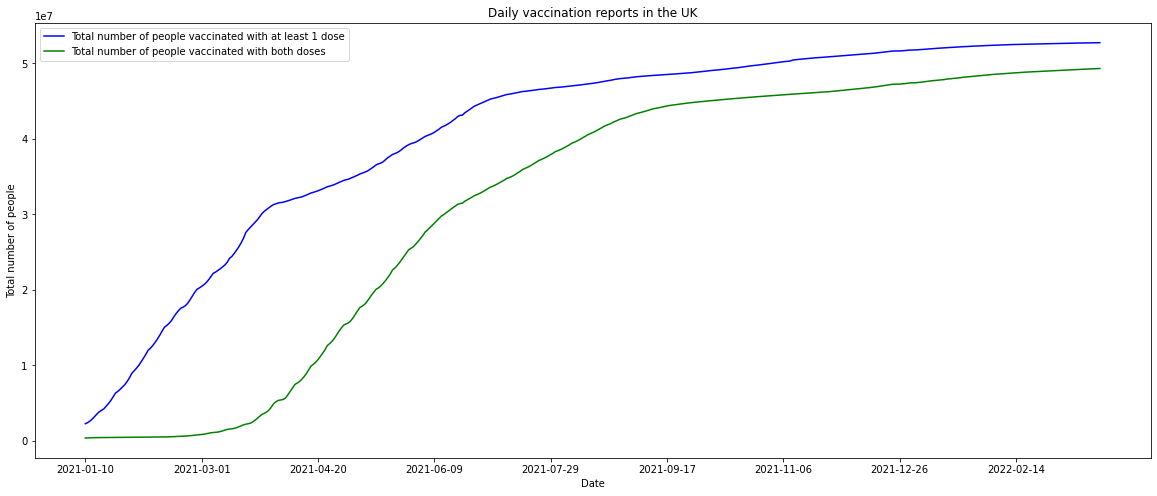

In [ ]:
peop_vacc = np.array(vacc_uk_df['people_vaccinated'])
peop_full_vacc = np.array(vacc_uk_df['people_fully_vaccinated'])
visualise_multiple_plots(vacc_date,peop_vacc,peop_full_vacc,"Date","Total number of people","Daily vaccination reports in the UK","Total number of people vaccinated with at least 1 dose","Total number of people vaccinated with both doses")

The number of people fully vaccinated with both doses of the vaccine is still lower than total number of people vaccinated, but, is slowly catching up. We can clearly see the 3 months gap between vaccine doses.

##What are the vaccines that were used in the UK?

In [ ]:
uk_vacc_manu = vacc_uk_df.groupby(["vaccine"]).sum()
uk_vacc_manu

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
vaccine,,,,
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",34491933704,16442732900,13661044736,4.388156e+09
"Oxford/AstraZeneca, Pfizer/BioNTech",1655168829,1531749079,123419750,0.000000e+00


Clearly, the manufacturers' names are clumped together with no way of separating them.

#Conclusions on Vaccination data UK
---
We have used pandas to read csv data from github, clean and sort the data, analyse and visualise the daily and total vaccinations, the number of people vacicnated, fully vaccinated and those who have been given a booster to get an understanding of the UK's vaccination program.

The data shows that the vaccination numbers are slowing down and the number of people fully vaccinated will be catching up to maximum soon.



#Vaccination data world-wide
---
It will be a good idea to have an idea of how the rest of the world is doing with the vaccinations and compare it to the UK. The world wide vaccination data can be found on github at 

https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true



##Retrieve Data

The world-wide data is in excel format. So, we will need a function to read Excel data from an url.

In [ ]:
def get_excel_data(url, string):
  df = pd.read_excel(url,sheet_name= string)
  return df

url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"
world_vacc = get_excel_data(url, 'by_country')

## Inspect the data 
---

One of the challenges in looking at world-wide data is that some columns might be missing values. so the data needs ot be cleaned and sorted.
1. Find out which columns have missing values


Use .info() for technical summary.

**Expected output:**
```
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
    Column                               Non-Null Count  Dtype         
                                
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_fully_vaccinated_per_hundred  6158 non-null   float64       
 11  daily_vaccinations_per_million       14796 non-null  float64       
 12  vaccines                             14994 non-null  object        
 13  source_name                          14994 non-null  object        
 14  source_website                       14994 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(5)
```

In [ ]:
print(world_vacc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

Next set of task is to remove null values/mising data
2. Remove all rows with missing data in the total_vaccination column  
3. Remove all rows with missing data in the daily_vaccinations_per_million 

In [ ]:
print(world_vacc.shape)

#remove missing data in total_vaccination
count_data = world_vacc.dropna(subset = ["total_vaccinations"])
print(count_data.shape)

#remove missing data in daily_vaccinations_per_million
count_data= count_data.dropna(subset = ["daily_vaccinations_per_million"])
print(count_data.shape)

(14994, 15)
(9011, 15)
(8816, 15)


Now the dataframe is all cleaned up for use.

Let's look at the stats.

In [ ]:
world_vacc.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.011000e+03,8.370000e+03,6.158000e+03,7.575000e+03,1.479600e+04,9011.000000,8370.000000,6158.00000,14796.000000
mean,4.964584e+06,3.164030e+06,1.580482e+06,1.347569e+05,7.769163e+04,15.456079,11.228710,5.66235,2972.163625
std,2.033452e+07,1.180919e+07,6.840161e+06,5.211912e+05,3.519679e+05,23.238675,15.269686,10.06184,4720.846894
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,6.000000e+04,5.154925e+04,2.350025e+04,2.888500e+03,8.967500e+02,1.330000,1.222500,0.63000,347.000000
50%,4.209400e+05,3.255035e+05,1.729175e+05,1.558300e+04,6.178500e+03,6.300000,4.825000,2.35000,1475.000000
75%,1.932222e+06,1.338161e+06,6.887102e+05,6.249850e+04,2.835000e+04,19.570000,14.667500,6.30000,3908.250000
max,2.753380e+08,1.470470e+08,1.047747e+08,1.160100e+07,7.205286e+06,211.080000,111.320000,99.76000,118759.000000


Let's find out the distribution for the daily vaccinations per million (since I plan to use it for comparison with the UK).

In [ ]:
ave_per_mill = count_data['daily_vaccinations_per_million'].mean()
ave_per_mill

3352.155626134301

In [ ]:
med_per_mill = count_data['daily_vaccinations_per_million'].median()
med_per_mill

1915.5

In [ ]:
mod_per_mill = count_data['daily_vaccinations_per_million'].mode()
mod_per_mill

0    0.0
dtype: float64

This definetely has a skewed distribution.

#Explore the data
---

###How does the UK's vaccination numbers compare with the rest of the world?

For this we will be looking at the column, on daily vaccinations per million. Since, this is a comparison, it will be quicker if we encoded the column. For this, we will be using the median value. The mean is not a robust tool since it is largely influenced by outliers. The median is better suited for skewed distributions to derive at central tendency since it is much more robust and sensible.

### Encode daily vaccinations column
---

Let's write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

In [ ]:

def encode_daily(df, **kwds):
  median = kwds['median']
  key = kwds['key']
  if df[key] > median:
    return 1
  else:
    return 0


count_data['daily_vaccinations_per_million_encoded'] = count_data.apply(encode_daily, axis =1, key = 'daily_vaccinations_per_million',median = med_per_mill)
print(count_data['daily_vaccinations_per_million_encoded'].describe())


count    8816.000000
mean        0.500000
std         0.500028
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: daily_vaccinations_per_million_encoded, dtype: float64


###How does the UK's daily vaccinations compare with the rest of the world?

The UK has been praised for its fast vaccine rollout. How true is this? Is the UK truly ahead of the rest of the world? **Let's find this out visually on a wrold map.** For this we need geopandas library so we can plot the data directly on the world map. So let's install geopandas.

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 25.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.9 MB/s 
     |████████████████████████████████| 16.7 MB 46.7 MB/s 


Using https://geopandas.org/en/stable/docs/user_guide/mapping.html as a guide, let's plot the 'daily_vaccinations_per_million_encoded' on to the world map.

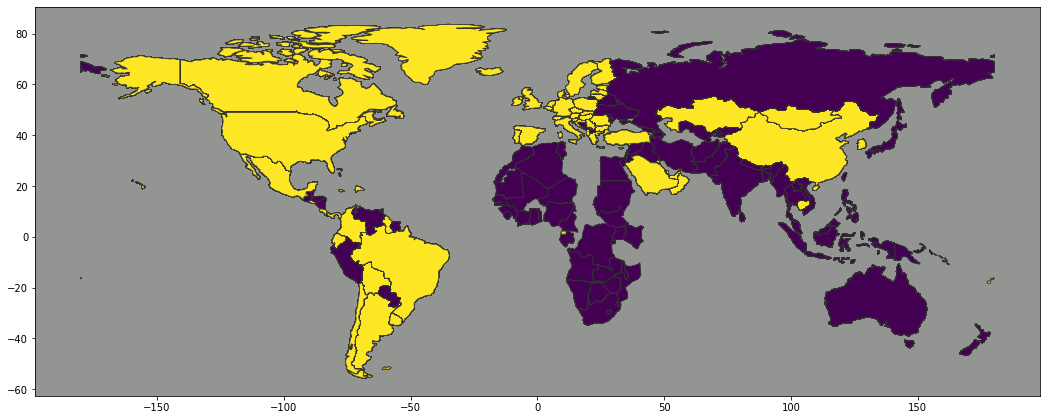

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Task daily_vaccinations in the world vs UK
def do_map_plot(df,variable):
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  merged = world.set_index('iso_a3').join(df.set_index('iso_code'))
  vmin = df[variable].min()
  vmax = df[variable].max()

  f, ax = plt.subplots(1, figsize=(18, 12))
  ax.set_facecolor('xkcd:grey')
  merged.plot(column=variable, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.2')
  # Create colorbar as a legend
  sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  return

variable = 'daily_vaccinations_per_million_encoded'

do_map_plot(count_data,variable)

The heatmap shows how many and which countries have the daily_vaccinations_per_million equal to or more than the UK (yellow) and the ones that are below the UK level (purple). 

##Note
Some of the vaccination data for some African countries like Chad, Libiya, Tanzania are missing. So, the world map is plotted only for the countries that we have data available in this dataset.

Let's do something similar for the total_vaccinations.

### Encoding total vaccinations   
---
How poor are some countries in rolling the vaccinations out? Are there places where the total vaccinations is even lower than the UK minimum? To answer these questions,

1. Find the minimum total vaccinations for the United Kingdom 
2. Encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK.

1. Minimum total_vaccinations in the UK

In [ ]:
# Task 1 Find the minimum total_vaccinations in the UK
min_uk = count_data.loc[count_data['country']=='United Kingdom','total_vaccinations'].min()
print(min_uk)

2677971.0


2. Encode total_vaccinations column

In [ ]:

count_data['total_vaccinations_encoded'] = count_data.apply(encode_daily, axis =1, key = 'total_vaccinations',median = min_uk)
print(count_data['total_vaccinations_encoded'].describe())


count    8816.000000
mean        0.214496
std         0.410496
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: total_vaccinations_encoded, dtype: float64


3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

In [ ]:

print("Task 3")
unique_country = count_data.groupby('total_vaccinations_encoded').apply(lambda x: x['country'].unique())
print(unique_country[1])

Task 3
['Argentina' 'Austria' 'Bangladesh' 'Belgium' 'Brazil' 'Canada' 'Chile'
 'China' 'Colombia' 'Czechia' 'England' 'France' 'Germany' 'Greece'
 'Hungary' 'India' 'Indonesia' 'Israel' 'Italy' 'Japan' 'Mexico' 'Morocco'
 'Netherlands' 'Poland' 'Portugal' 'Romania' 'Russia' 'Saudi Arabia'
 'Scotland' 'Serbia' 'South Korea' 'Spain' 'Sweden' 'Turkey'
 'United Arab Emirates' 'United Kingdom' 'United States']


How about visually seeing this on the world map?

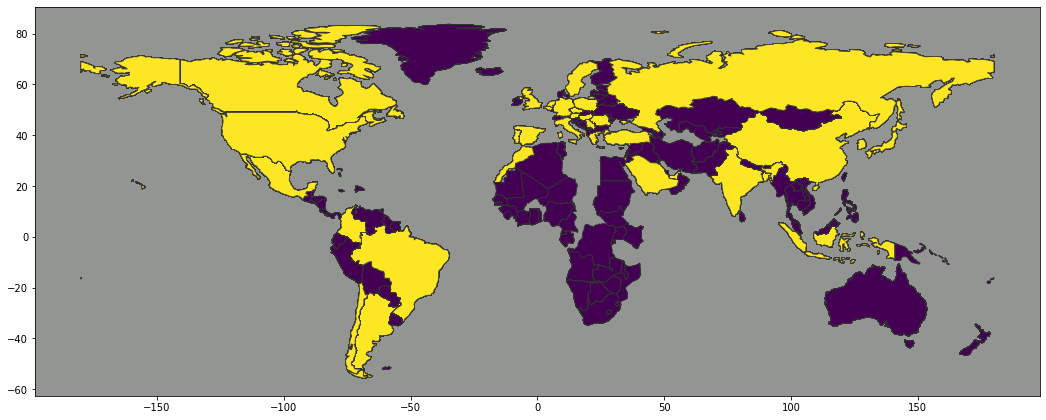

In [ ]:
variable1 = 'total_vaccinations_encoded'

do_map_plot(count_data,variable1)

The heatmap here shows how many and which countries have the total_vaccinations that are at least equal to or more than the UK's minimum vaccination (yellow) and the ones that are below the UK level (purple).

This map when compared with the previous map on daily vaccinations show that some countries like Finland although have daily_vaccinations higher or same as the UK, their total vaccinations are less than that of the UK (purple).

**We can repeat this for any of the columns and dataframes**

### Total vaccinations by manufacturer
---
The excel workbook on world-wide vaccination data also contains information on the vaccine manufacturers. So it's time to explore that as well.

Let's create a new dataframe on vaccine manufacturer details and answer questions such as which among the vaccines is most popular world-wide?

Read data from 'by_manufacturer' sheet from Covid data

In [ ]:
manu_df = get_excel_data(url, 'by_manufacturer')

Find the sum of total vaccinations for each manufacturer

In [ ]:
manu_tot = manu_df.groupby(["vaccine"]).sum()
print(manu_tot)

                    total_vaccinations
vaccine                               
Johnson&Johnson              264839828
Moderna                     5548036383
Oxford/AstraZeneca           539433203
Pfizer/BioNTech             8690461304
Sinovac                      604660293


In [ ]:
manu_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Johnson&Johnson to Sinovac
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_vaccinations  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes


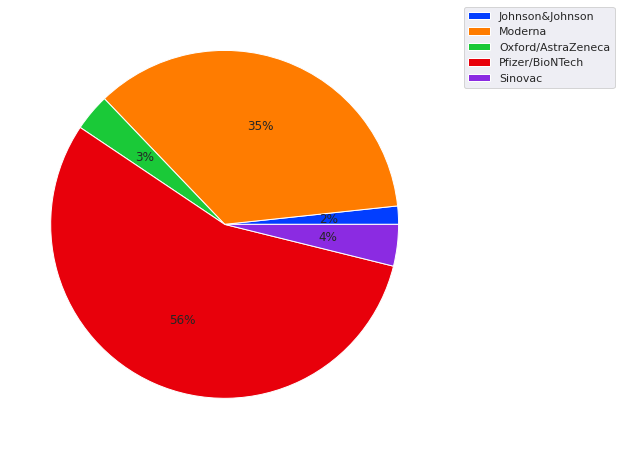

In [ ]:
import seaborn as sns

def do_pie_plot(x,y):
  plt.figure(figsize = (10,8))
  sns.set(style="darkgrid")
  colors = sns.color_palette('bright')
  plt.pie(y.ravel(), colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return

x = manu_tot.index.tolist()
y = np.array(manu_tot)
do_pie_plot(x,y)

To answer our question from before, the above plot shows that Pfizer seems to be most used (in terms of sheer population number) followed by Moderna. 

This looks totally out of reality. One would expect a larger percentage for Astrazeneca and Sinovac due to population sizes of the countries that administered them! Also, a lot of other vaccines like Novavax, Covaxin are missing!

A more latest data on vaccine manufacturers and world-wide vaccine data can be found at "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"

Again, the original source of this data is unknown and more information can be found at https://ourworldindata.org/grapher/covid-vaccine-doses-by-manufacturer?tab=table&country=~European+Union for each country.

But for our purposes on looking at the manufacturer details on vaccines, this will do!

#Read the data

In [ ]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
vacc_man_df = get_csv_data(url)

#Inspect the data

In [ ]:
vacc_man_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35198 entries, 0 to 35197
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35198 non-null  object
 1   date                35198 non-null  object
 2   vaccine             35198 non-null  object
 3   total_vaccinations  35198 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
vacc_man_df.describe()

,total_vaccinations
count,3.519800e+04
mean,1.486290e+07
std,5.120154e+07
min,0.000000e+00
25%,9.544700e+04
50%,1.282392e+06
75%,7.857659e+06
max,5.998878e+08


We are mainly interested in vaccine type, total vaccinations, let's group by the manufacturers (vaccine column).

In [ ]:
vacc_man_tot = vacc_man_df.groupby(["vaccine"]).sum()
print(vacc_man_tot)

                    total_vaccinations
vaccine                               
CanSino                      264789667
Covaxin                           3506
Johnson&Johnson            12247706289
Moderna                    99912234742
Novavax                        5742093
Oxford/AstraZeneca         45553439299
Pfizer/BioNTech           335796524538
Sinopharm/Beijing          10492962397
Sinovac                    13217702821
Sputnik V                   5653298983


Now, let's look at the pie chart!

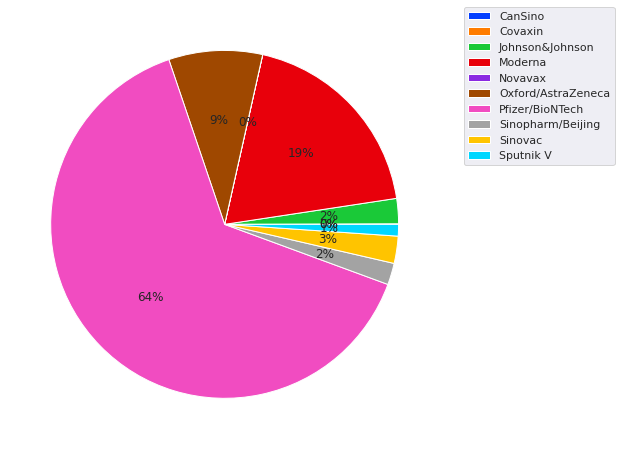

In [ ]:
x = vacc_man_tot.index.tolist()
y = np.array(vacc_man_tot)
do_pie_plot(x,y)

This shows many more vaccine manufacturers list and seems more reasonable. We can repeat all the previous analyses with this new data set. We just need to call the function with the new dataframe.

#Conclusions on World-wide Vaccination data
---
We have used pandas to read the Excel data from github, clean and sort the data, analyse and visualise the daily and total vaccinations world-wide and compare them to the UK using encoding. Using geopandas to visualise the comparison on the world-map shows that:

While there are some countries who have vaccination program that are at least as efficient as the UK's program, there are still countries in the world struggling to keep up with the UK.

Again, there are limitations to the dataset used in this section (incomplete and/or in need of updating). The whole analyses can be repeated with any updated dataset - like we did with the piechart for the manufacturers. 


##**Important Note:**
All of these conclusions are based on the datasets provided by the various sources. The original sources of data or the quality of these datasets, in some cases are unknown and, are available in github for free use. Hence the analyses seen here are to be taken simply as few examples of what type of analyses can be done with Covid-data using python.

#Conclusion

Using the above mentioned datasets, I have been able to use a variety of skills in pandas, numpy, seaborn, matplotlib etc to give some examples of the type of analyses that can be done using python for infectious diseases. The first step in modelling of these diseases for predictions and evaluations of interventions is to understand the available data. But any conclusions based on these analyses are as good as the data source. So reliability of data is also equally important (if not more!). I wish I had more time to do some infectious disease modelling as well - that is how much I enjoyed this project! 

# Reflection
---

### What I have achieved in this project?
It was a fun project to work on and very relevant as well. I feel more confident in using python to read data formats like json, csv and Excel. I have cleaned, sorted, grouped the various dataframes in pandas. I have used my skills in numpy for dealing with numerical data and matplotlib and seaborn for visualisations.

I have wrangled and merged two datasets to compare the hospitalisations and deaths. I have used encoding numerical data to speed up my calculations and also have used geopandas for visualisations on maps.

Initially, I set out to study COVID-19 outbreak, look at the current (March 2022) UK data on confirmed cases, hospitalisation and UK vaccination datas and compare it to the world-wide vaccination using analyses and visualisations. I have achieved all of these.

## What could I do better in the future?
---
The raw data are available from various sources and they are not all formatted in similar ways that make wrangling and comparing or putting them all together into one dataframe extremely difficult. In the future, I would like to spend some extra time trying to sort, format and wrangle the dataframes so that we can compare information between dataframes to gain better understanding by looking all the information together.